In [16]:
from tracemalloc import Snapshot
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
import glob
import os
import json as js



us_youtube_df = pd.read_csv('../data/USvideos.csv')
us_youtube_df.sample(5)



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
11773,ziLNTsTPL4k,18.13.01,2 bros chillin in a bath tub,AnthonyPadilla,23,2018-01-08T17:08:03.000Z,"anthony padilla|""padilla""|""anthony padilla you...",315999,29620,367,1303,https://i.ytimg.com/vi/ziLNTsTPL4k/default.jpg,False,False,False,I made my biggest life change in 2017 and I'm ...
3674,pJ96Z2PPKI8,17.02.12,The Voice 2017 - Team Miley: Man! I Feel Like ...,The Voice,24,2017-11-29T02:10:41.000Z,"the voice|""the voice nbc""|""the voice season 13...",1025124,19508,836,1468,https://i.ytimg.com/vi/pJ96Z2PPKI8/default.jpg,False,False,False,"Miley Cyrus joins Ashland Craft, Brooke Simpso..."
33063,iWZmdoY1aTE,18.06.05,Ed Sheeran - Happier (Official Video),Ed Sheeran,10,2018-04-27T08:40:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",35020204,1248218,28432,63205,https://i.ytimg.com/vi/iWZmdoY1aTE/default.jpg,False,False,False,÷. Out Now: https://atlanti.cr/yt-albumSubscri...
29150,Hgiu9cqph5Y,18.17.04,A Japanese Take on American Sushi,JunsKitchen,26,2018-04-16T11:01:57.000Z,"cook|""cat""|""Jun""|""Rachel""|""Japanese""|""food""|""p...",1098295,78936,973,6757,https://i.ytimg.com/vi/Hgiu9cqph5Y/default.jpg,False,False,False,Thank you all so much for watching! \n\nMy Pa...
23873,OBOm_jatVCI,18.15.03,Blind Fast Food Sub Sandwich Taste Test,Good Mythical Morning,24,2018-03-07T11:00:02.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",2143277,38244,1555,4728,https://i.ytimg.com/vi/OBOm_jatVCI/default.jpg,False,False,False,Can we decipher the difference between Subway ...


In [17]:
# Identify top 10 key influencers
# correlating publish time and views to determine most popular time for viewing content
# correlating/counting views, likes, dislikes, comments
# add csv for titles of youtube video id
us_youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [18]:
#Who are the top 10 YouTube Channels based off likes.

sort_by_likes = us_youtube_df[['channel_title', 'likes']].sort_values('likes', ascending=False)
sort_by_likes.sample(10)


,channel_title,likes
17853,Life Noggin,14487
24061,Peter McKinnon,18494
17020,Jenny Nicholson,13748
36998,Bon Appétit,21692
36901,TED,57808
35939,BuzzFeed Celeb,189440
37731,Gallant,8319
24884,SB Nation,6260
25047,Anwar Jibawi,65880
32154,Epicurious,11024


In [19]:
popular_by_likes = (
    sort_by_likes
        .groupby(by='channel_title')
        .sum()
        .sort_values(by='likes', ascending=False)
        .head(10)
    )
popular_by_likes


,likes
channel_title,
ibighit,199247121
ChildishGambinoVEVO,96700818
Dude Perfect,60275557
Marvel Entertainment,55873344
ArianaGrandeVevo,52170970
jypentertainment,44900910
TaylorSwiftVEVO,39292840
Ed Sheeran,39279211
ZaynVEVO,31695245


In [20]:
#Who are the top 10 YouTube Channels based off views and likes.

sort_by_views = us_youtube_df[['channel_title', 'views','likes']].groupby('channel_title').sum().sort_values(by='views', ascending=False).head(10)
sort_by_views

,views,likes
channel_title,,
ChildishGambinoVEVO,3758488765,96700818
ibighit,2235906679,199247121
Dude Perfect,1870085178,60275557
Marvel Entertainment,1808998971,55873344
ArianaGrandeVevo,1576959172,52170970
MalumaVEVO,1551515831,23278380
jypentertainment,1486972132,44900910
Sony Pictures Entertainment,1432374398,30106808
FoxStarHindi,1238609854,23762509


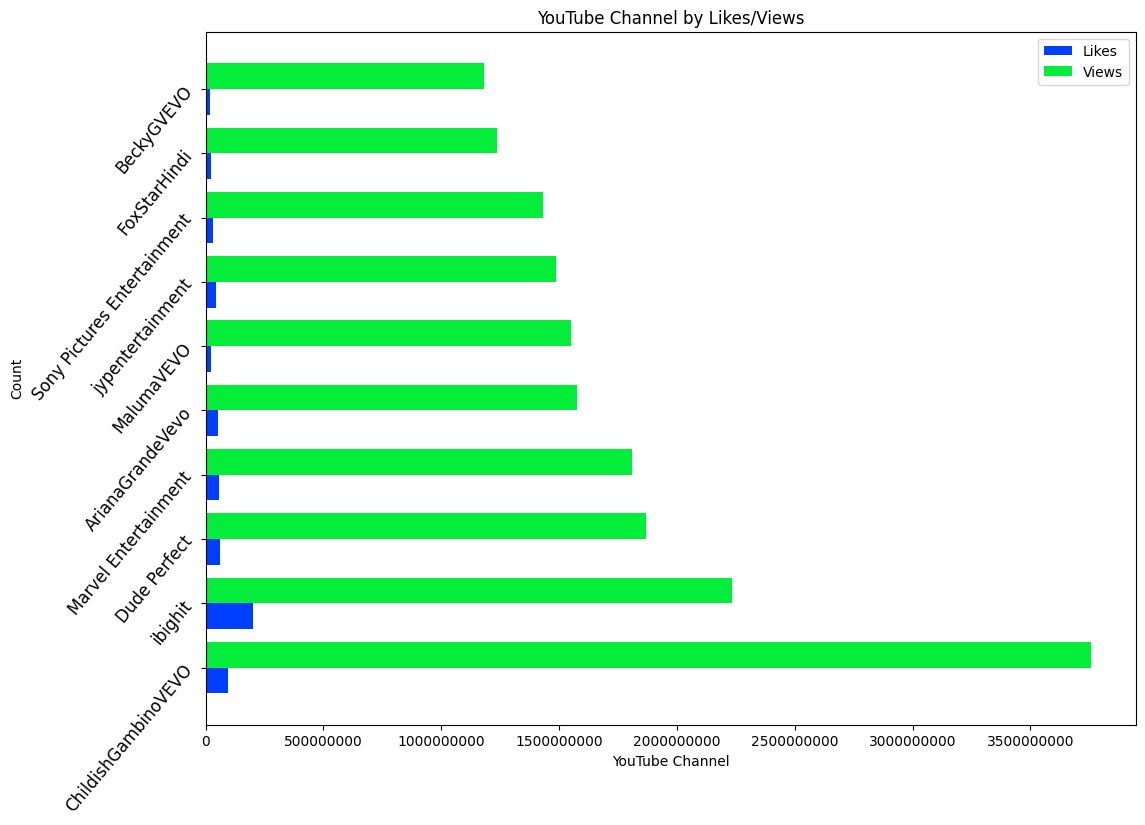

<Figure size 640x480 with 0 Axes>

In [21]:
#Graphing Top Channels by views and likes
fig, ax = plt.subplots(figsize=(12,9))
likes = sort_by_views['likes']
views = sort_by_views['views']
chan_name = sort_by_views.index
  
chan_name_axis = np.arange(len(chan_name))
  
plt.barh(chan_name_axis - 0.2, likes, 0.4, label = 'Likes')
plt.barh(chan_name_axis + 0.2, views, 0.4, label = 'Views')
plt.ticklabel_format(axis='x',style='plain')
#ax.set_xticklabels(cat_name, rotation=60, horizontalalignment='right', fontsize='12')
plt.yticks(chan_name_axis, chan_name, rotation=50, horizontalalignment='right', fontsize='12')
plt.xlabel("YouTube Channel")
plt.ylabel("Count")
plt.title("YouTube Channel by Likes/Views")
plt.legend()
plt.show()
plt.savefig('../img/YouTube Channel Popular by Likes and Views.png', bbox_inches = 'tight')



In [22]:
#Styling graph
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-bright')


In [23]:
#Created hour column to determine correlation between views/likes/comments/time
us_youtube_df['hour'] = pd.DatetimeIndex(us_youtube_df['publish_time']).hour
us_youtube_df['hour']
us_youtube_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,hour
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,17
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",7
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,19
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,18


In [24]:
#Aggregating all engagement variables IOT caluclate correlations
views_times_corr = us_youtube_df.groupby(by='hour').sum()
views_times_corr.reset_index(inplace=True)
views_times_corr = views_times_corr[['views','likes','dislikes','comment_count','hour']]
views_times_corr


,views,likes,dislikes,comment_count,hour
0,2102430591,73069720,3493351,9796941,0
1,2608009982,74352959,4767974,8664745,1
2,1963268573,45572875,1324981,5331817,2
3,2722928516,68135410,3190260,6852700,3
4,9267508289,274128766,13279444,26177737,4
5,2987912716,105412432,4580425,9429649,5
6,871993900,17900061,867398,1543115,6
7,2903306925,65500127,2924998,5763321,7
8,2693147800,69970016,3587501,7430604,8
9,3477575589,160007663,4947730,27064292,9


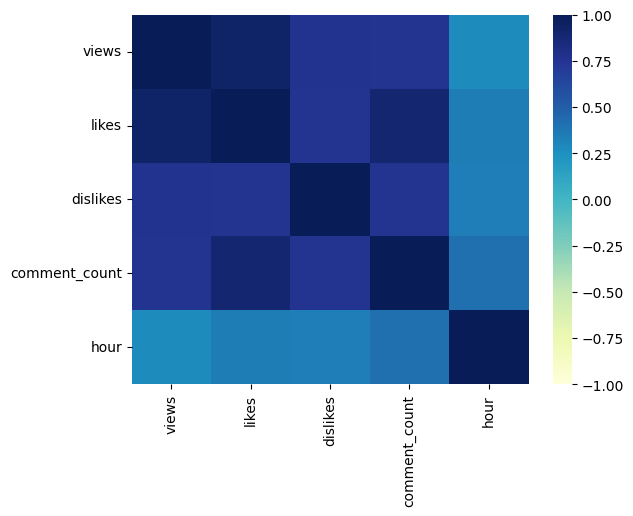

In [25]:
#Creating Correlation graph
sns.heatmap(views_times_corr.corr(),vmin=-1,cmap='YlGnBu')
plt.savefig('../img/Correlation.jpg', bbox_inches = 'tight')

In [26]:
#Ingesting JSON file to create Catgory by name column 
id_list = (
    us_youtube_df
        .groupby(by=['category_id'])
        .sum()
        .sort_values(by='views', ascending=False)
        .head(10)
    )
id_list.reset_index(inplace=True)

with open ('../data/US_category_id.json') as f:
    data = js.loads(f.read())
us_json_df = pd.json_normalize(data, record_path=['items'])

title_id = us_json_df[['id','snippet.title']].set_index('id')
title_id

title_id.index = title_id.index.astype('int64')
title_id_dict = title_id.to_dict()
title_id_dict['snippet.title']

id_list['category_id_name'] = id_list['category_id'].replace(title_id_dict['snippet.title'])
id_list

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,hour,category_id_name
0,10,40132892190,1416838584,51179008,125296396,9,24,0,77816,Music
1,24,20604388195,530516491,42987663,73566498,196,30,8,138004,Entertainment
2,1,7284156721,165997476,6075148,17887060,28,14,13,34789,Film & Animation
3,23,5117426208,216346746,7230391,22545582,2,0,0,48511,Comedy
4,22,4917191726,186615999,10187901,24778032,66,37,0,44974,People & Blogs
5,17,4404456673,98621211,5133551,11192155,28,17,2,25805,Sports
6,26,4078545064,162880075,5473899,23149550,11,11,0,61154,Howto & Style
7,28,3487756816,82532638,4548402,11989926,90,16,0,34401,Science & Technology
8,20,2141218625,69038284,9184466,14740713,8,0,0,12207,Gaming
9,25,1473765704,18151033,4180049,6039433,174,1,0,34863,News & Politics


In [27]:
#Sorting new dataframe with category column by views
id_list.sort_values(by='views',ascending=False)


,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,hour,category_id_name
0,10,40132892190,1416838584,51179008,125296396,9,24,0,77816,Music
1,24,20604388195,530516491,42987663,73566498,196,30,8,138004,Entertainment
2,1,7284156721,165997476,6075148,17887060,28,14,13,34789,Film & Animation
3,23,5117426208,216346746,7230391,22545582,2,0,0,48511,Comedy
4,22,4917191726,186615999,10187901,24778032,66,37,0,44974,People & Blogs
5,17,4404456673,98621211,5133551,11192155,28,17,2,25805,Sports
6,26,4078545064,162880075,5473899,23149550,11,11,0,61154,Howto & Style
7,28,3487756816,82532638,4548402,11989926,90,16,0,34401,Science & Technology
8,20,2141218625,69038284,9184466,14740713,8,0,0,12207,Gaming
9,25,1473765704,18151033,4180049,6039433,174,1,0,34863,News & Politics


In [28]:
#Combining views/likes/category name to identify popularity by category
id_list_all_vars = id_list[[
                'category_id_name',
                'likes',
                'views',
                            ]]
id_list_all_vars = id_list_all_vars.set_index('category_id_name')
id_list_all_vars.sort_values(by='views',ascending=False)

,likes,views
category_id_name,,
Music,1416838584,40132892190
Entertainment,530516491,20604388195
Film & Animation,165997476,7284156721
Comedy,216346746,5117426208
People & Blogs,186615999,4917191726
Sports,98621211,4404456673
Howto & Style,162880075,4078545064
Science & Technology,82532638,3487756816
Gaming,69038284,2141218625


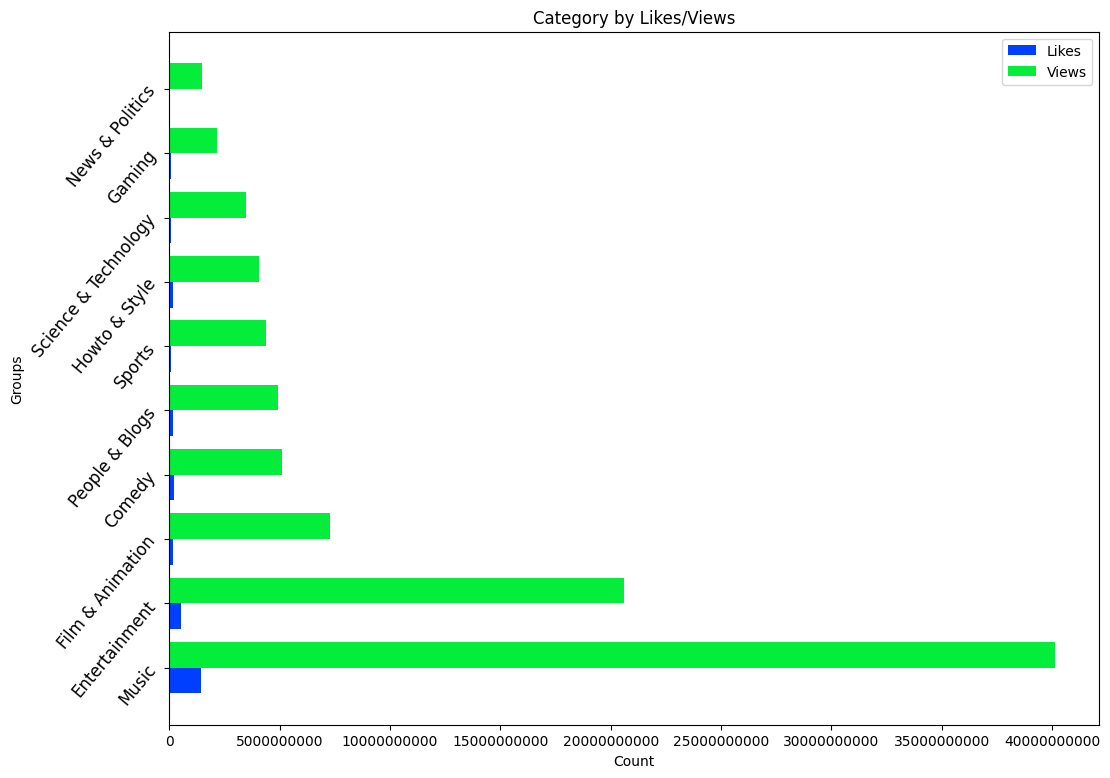

<Figure size 640x480 with 0 Axes>

In [29]:
#Graphing category by popularity
fig, ax = plt.subplots(figsize=(12,9))
likes = id_list_all_vars['likes']
views = id_list_all_vars['views']
cat_name = id_list_all_vars.index
# X = ['Group A','Group B','Group C','Group D']
# Ygirls = [10,20,20,40]
# Zboys = [20,30,25,30]
  
cat_name_axis = np.arange(len(cat_name))
  
plt.barh(cat_name_axis - 0.2, likes, 0.4, label = 'Likes')
plt.barh(cat_name_axis + 0.2, views, 0.4, label = 'Views')

#ax.set_xticklabels(cat_name, rotation=60, horizontalalignment='right', fontsize='12')
ax.ticklabel_format(axis='x',style='plain')
plt.yticks(cat_name_axis, cat_name, rotation=50, horizontalalignment='right', fontsize='12')
plt.xlabel("Count")
plt.ylabel("Groups")
plt.title("Category by Likes/Views")
plt.legend()
plt.show()
plt.savefig('../img/YouTube Category Popular by Likes and Views.png', bbox_inches = 'tight')